In [1]:
# Import Library 

import re
from re import search

import unicodedata
from bs4 import BeautifulSoup
from bs4 import Tag 

from bs4 import NavigableString
from bs4 import SoupStrainer
from pprint import pprint

import numpy as np
from numpy import array
import pandas as pd 

from itertools import groupby
from operator import itemgetter

import csv
import pickle

from collections import Counter
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from IPython.core import display as ICD
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', None)

In [2]:
company_name = {'Tesla' : '0001318605',
                'Microsoft': '0000789019',
                'Apple' : '0000320193',
               'Netflix': '0001065280',
               'Facebook' : '0001326801',
               'Google' : '1652044',
               'Ford' : '0000037996',
               'Amazon' : '0001018724',
                'GM' : '0001467858'}

In [3]:
dfs = []
for name, CIK in company_name.items(): 
    company_df = pd.read_csv(f'C:/Users/Matthew/Documents/Machine Learning Accelerator/Capstone Project/1 Predict Stock Price/{name}/abt-{name}.csv')
    print(name)
    company_df['company_name'] = '{}'.format(name)
    print(company_df.shape)
#     ICD.display(company_df)
    dfs.append(company_df)
    print()


Tesla
(22, 38)

Microsoft
(32, 28)

Apple
(26, 31)

Netflix
(48, 25)

Facebook
(22, 26)

Google
(19, 32)

Ford
(30, 34)

Amazon
(50, 25)

GM
(43, 38)



# 1. Exploratory Analysis

In [4]:
abt = pd.concat(dfs, sort=False,ignore_index=True )
print(abt.shape)
abt.groupby(['company_name'], sort=True).mean()

(292, 113)


,Year,Cash,Accounts Receivable,Inventory,Prepaid expenses and other current assets,Total current assets,Operating lease vehicles,Solar energy systems,Property and Equipment,Intangible assets,Goodwill,Total assets,Accounts payable,Accrued Liabilities,Customer deposits,Total current liabilities,Other long term liabilities,Total liabilities,Common Stock,Additional paid in capital,Accumulated other comprehensive loss,Accumulated deficit,Total liabilities and equity,Total Deferred Revenue,Total Noncontrolling interests in subsidiaries,Total Shareholder Equity,MyPower customer notes receivable,Other assets,Total Resale value guarantees,Current portion of long term debt and capital leases,Long term debt and capital leases,Solar bonds issued to related parties,Total Convertible Senior Notes,Restricted cash and marketable securities,Total Restricted Cash,Short term investments,Other long term assets,Accrued compensation,Short term unearned revenue,Long term debt,Long term unearned revenue,Retained Earnings,Total Other,Accumulated comprehensive income,Vendor non trade receivables,Other current assets,Other non current assets,Other non current liabilities,Accumulated other comprehensive income/,Total shareholders equity,...,Accumulated comprehensive loss,Non Current liabilities,Marketable securities,Partners payable,Accrued expenses and other current liabilities,Other liabilities,Accumulated Other Comprehensive loss,Total cash,Income taxes receivable,Non marketable investments,Accrued compensation and benefits,Accrued revenue share,Total Deferred income taxes,Total Income taxes payable,Accumulated Comprehensive Income,Equity in assets of affiliated companies,Payables,Automotive debt payable within one year,Automotive long term debt,Class B Stock,Capital in excess of par value of stock,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,31000000,Debt,Total Cash,Total Other assets,Total Net investment in operating leases,Redeemable noncontrolling interest,Accrued expenses and other,Total non current liabilities,Total Property and Equipment,Equity in assets of nonconsolidated affiliates,Total non current assets,Total Assets,Postretirement benefits other than pensions,Pensions,Total Liabilities,Shareholder Equity,Noncontrolling interests,Total Equity,Total Automotive,Total GM Financial,Total Restricted cash and marketable securities,Series A,Series B,Capital surplus,Accumulated other comprehensive income
company_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Amazon,2013.500000,9.612340e+09,5.658860e+09,7.651140e+09,NaN,2.856470e+10,NaN,NaN,NaN,NaN,4.790480e+09,6.088600e+10,1.465530e+10,NaN,NaN,2.602540e+10,NaN,NaN,4.820000e+06,1.271828e+10,NaN,NaN,6.088600e+10,NaN,NaN,1.649140e+10,NaN,4.216440e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.929420e+09,NaN,4.444200e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.512540e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382260e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.981200e+09,1.836920e+10,2.093610e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apple,2016.500000,2.577219e+10,1.528931e+10,3.299346e+09,NaN,1.076996e+11,NaN,NaN,2.854373e+10,NaN,4.697412e+09,3.119605e+11,3.506608e+10,NaN,NaN,8.175215e+10,NaN,1.929605e+11,3.329146e+10,NaN,NaN,NaN,3.119605e+11,1.146025e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.210068e+10,NaN,8.635554e+10,NaN,NaN,1.309442e+10,1.103438e+10,2.039633e+10,3.893669e+10,1.230696e+09,1.190000e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Facebook,2017.000000,9.278727e+09,4.644000e+09,NaN,1.362818e+09,4.005695e+10,NaN,NaN,1.559245e+10,2.201636e+09,1.821345e+10,7.965432e+10,4.372273e+08,NaN,NaN,5.460818e+09,NaN,

# 2. Data Cleaning
## 2.1 Merging features with different names.

After exploring the data, we find the column names have duplicates. For example, **'Deferred Revenue'** is sometimes referred to as **'Short term unearned revenue'**, **'Long term unearned revenue'**. 

We will try to group all these different columns into one column. 

### Deferred Revenue, an example

In [5]:
abt[['Total Deferred Revenue', 'Short term unearned revenue', 'Long term unearned revenue', 
          'Deferred Revenue']].groupby(abt['company_name'], sort=True).mean().notna().astype(int)

,Total Deferred Revenue,Short term unearned revenue,Long term unearned revenue,Deferred Revenue
company_name,,,,
Amazon,0,0,0,1
Apple,1,0,0,0
Facebook,0,0,0,1
Ford,1,0,0,0
GM,1,0,0,0
Google,1,0,0,0
Microsoft,0,1,1,0
Netflix,0,0,0,1
Tesla,1,0,0,0


In [6]:
# Different columns referring to the same concept. 
Sum_DR = ['Total Deferred Revenue', 'Short term unearned revenue', 'Long term unearned revenue', 'Deferred Revenue']

In [7]:
# Set a variable for the new column name.
new_col_name = 'New Deferred Revenue'

# Take the sum of comceptually equivalent columns. Notice we keep null values. 
abt[new_col_name] = abt[Sum_DR].sum(axis=1, min_count=1)

# Delete the original parent columns.  
abt.drop(Sum_DR, axis=1, inplace=True)

# Display the number of null objects in the new column after combining.
missing_in_new_col = abt[['company_name', new_col_name, 'Filing/Acc.No.']][abt[new_col_name].isna()]
print(missing_in_new_col.shape)
missing_in_new_col

(10, 3)


,company_name,New Deferred Revenue,Filing/Acc.No.
54,Apple,NaN,"10-Q, 0000320193-20-000052"
55,Apple,NaN,"10-Q, 0000320193-20-000010"
56,Apple,NaN,"10-Q, 0000320193-19-000076"
57,Apple,NaN,"10-Q, 0000320193-19-000066"
58,Apple,NaN,"10-Q, 0000320193-19-000010"
74,Apple,NaN,"10-K, 0000320193-19-000119"
188,Ford,NaN,"10-Q, 0000037996-13-000055"
189,Ford,NaN,"10-Q, 0000037996-13-000042"
190,Ford,NaN,"10-Q, 0000037996-13-000027"
198,Ford,NaN,"10-K, 0000037996-13-000014"


After engineering this new feature, there are still 10 instances of missing values in the new column. 

We will handle this shortly after we  iterate this 'sum-and-delete' method systemaically across all columns in the dataframe. 

In [8]:
# First we create a list of similar columns and create a new name for the summed value of these columns. 
# i.e. save_dict = { new_col_name : [similar_cols] }

col_name_converter = {
# Property and Equipment
    'New Property and Equipment' : ['Property and Equipment', 'Total Property and Equipment'],
    
# Assets ( except 'Total current assets' )
    'Total Non-Current Assets' : ['Total non current assets', 'Other non current assets', 'Other long term assets', 
                                  'Intangible assets', 'Other assets'],
    'Total_Assets' : ['Total Assets', 'Total assets'],
    
# Liabilities ( except 'Total current liabilities' )
    'Non-Current Liabilities' : ['Total non current liabilities',  'Long term debt and capital leases', 'Long term debt', 'Debt', 
          'Other liabilities', 'Non Current liabilities'],
    
# Shareholder's Equity
    "Total Shareholder's Equity" : ['Total Shareholder Equity', 'Total shareholders equity', 'Shareholder Equity', 'Total equity'],
    
# Account Payables
    'Accounts Payables' : ['Accounts payable', 'Payables'],
    
# Retained Earnings
    'Retained Earning' : ['Retained Earnings', "Accumulated deficit"],
    
# OCI 
    'OCI' : ['Accumulated other comprehensive income/', 'Accumulated comprehensive loss', "Accumulated other comprehensive loss", 
             'Accumulated other comprehensive income', 'Accumulated Other Comprehensive loss', 'Accumulated Comprehensive Income',
             'Accumulated comprehensive income'],
    
# Cash 
    'Cash' : ['Cash', 'Total Cash']
}
# Exceptions
# Account Receivable, Only missing Netflix
# Common Stock, Only missing Facebook


# Columns need to be deleted not mentioned above: 
del_col = [
    # Assets
    'Other current assets', 'Prepaid expenses and other current assets', 'Acquired intangible assets', 
           'Equity in  assets of affiliated companies', 
    # Liabilities
    'Current portion of long term debt and capital leases', 'Current portion of long term debt', 'Total Liabilities',
    'Other long term liabilities', 
    # Other 
    'Total equity attributable to Ford Motor Company', 'Equity attributable to noncontrolling interests', 
    'Partners payable', 'Total Income taxes payable', 'Class B Stock', 'Capital in excess of par value of stock',
    'Treasury stock', 'Total cash', 'Class B Stock', 'Capital in excess of par value of stock', 'Treasury stock'
] 


In [9]:
for new_name, old_name_list in col_name_converter.items():
    abt[new_name] = abt[old_name_list].sum(axis=1, min_count=1)
    abt.drop(old_name_list, axis=1, inplace=True)
    

In [10]:
abt.drop(del_col, axis=1, inplace=True)

In [11]:
abt.shape

(292, 70)

After combining similar columns listed above. We have mangaged to reduce the number of columns from 113 to 70! 

Thats's a ~38% reduction. But we can do a little better. 

## 2.2 Missing data at company-level.

The amount of information reported in the balance sheet differ from different companies; for these features we will not impute the numbers since the missing data is structurally and conceptually different from every other data point collected. 

Instead we will represent the nothingness by creating an **indicator variable**. 
And in order to allow the machine learning algorithms to run smoothly, we fill in the original missing data with **int(0)** .

### Account Receivable, missing NTLX

In [12]:
# Double check to see if there is only one company missing this feature. 
abt[[ 'company_name', 'Accounts Receivable']].groupby(abt['company_name'], sort=True).mean().notna().astype(int)

,Accounts Receivable
company_name,
Amazon,1
Apple,1
Facebook,1
Ford,1
GM,1
Google,1
Microsoft,1
Netflix,0
Tesla,1


In [13]:
# How many missing data in total? 
abt['Accounts Receivable'].isnull().sum()

48

In [14]:
# Double check nothing funny is going in the df. Checking top 5 rows.
abt[['company_name', 'Accounts Receivable']][abt['company_name'] == 'Netflix'].head(5)

,company_name,Accounts Receivable
80,Netflix,NaN
81,Netflix,NaN
82,Netflix,NaN
83,Netflix,NaN
84,Netflix,NaN


In [15]:
# Create Indicator Variable 
abt['Accounts_Receivable_missing'] = abt['Accounts Receivable'].isnull().astype(int)

In [16]:
# Fill in the original missing value with 0.
abt['Accounts Receivable'].fillna(0, inplace=True)

In [17]:
# Checking if there are any other missing values in the feature. 
abt[ 'Accounts Receivable'].isnull().sum()

0

We will repeat the process for the next feature - 'Common Stock'.

### Common Stock, missing FB

In [18]:
print('Amount of missing values prior the operation')
abt['Accounts Receivable'].isnull().sum()

Amount of missing values prior the operation


0

In [19]:
# Create Indicator Variable 
abt['Common_Stock_missing'] = abt['Common Stock'].isnull().astype(int)

In [20]:
# Fill in the original missing value with 0.
abt['Common Stock'].fillna(0, inplace=True)

In [21]:
print('Amount of missing values after the operation')
abt[ 'Accounts Receivable'].isnull().sum()

Amount of missing values after the operation


0

### Total Liabilities, missing Amazon and GM

Amazon and GM both share a missing feature - **Total liabilities** that every other company has reported.

To remedy this,  we added together the values in **'Total current liabilities'**, **'Non-Current Liabilites'** to 'impute' the missing values because the relationship is conceptually coherent. 

In [22]:
# Number of missing values before operation. 
abt[['company_name', 'Total liabilities']].isnull().sum()

company_name          0
Total liabilities    95
dtype: int64

In [23]:
# Creating a Series summing all the numbers from Amazon and GM on columns 'Total current liabilities', 'Non-Current Liabilites'.
artifical_sum = abt[['Total current liabilities', 'Non-Current Liabilities']][(abt['company_name'] == 'Amazon') | (abt['company_name'] == 'GM' )].sum(axis=1, min_count=1)

In [24]:
# Inserting in the Series data into the existing df. 
abt['Total liabilities'].fillna(artifical_sum, inplace=True)

In [25]:
# Number of missing values after operation. 
abt[['company_name', 'Total liabilities']].isnull().sum()

company_name         0
Total liabilities    2
dtype: int64

There are still 2 missing values.  
Now let's interpolate the remaining the **sparse** missing values. 

But before we do that we will want to dicard features that have too many missing oberservations. 

We do this now and not after intrerpolation becasue we can save computation time and computational space.

In [26]:
# Features that do not have missing values.
print(f'There are {len(abt.columns[abt.isna().sum() == 0])} clean columns.')
print(sorted(list(abt.columns[abt.isna().sum() == 0])))

There are 12 clean columns.
['Accounts Receivable', 'Accounts_Receivable_missing', 'Common Stock', 'Common_Stock_missing', 'Filing/Acc.No.', 'New Property and Equipment', 'Quarter', "Total Shareholder's Equity", 'Total liabilities and equity', 'Total_Assets', 'Year', 'company_name']


In [27]:
#Creating dirty_col_name list. i.e. these columns have missing value.
dirty_col_name = list(abt.columns[abt.isna().sum() > 0])
print(f'dirty_col_name list has {len(dirty_col_name)} values')


dirty_col_name list has 60 values


In [28]:
# Are all values in dirty_col_name unique?
print(len(set(dirty_col_name)) == len(dirty_col_name))

True


In [29]:
# Columns that need to be cleaned/merged. 
count = 1
hope_list = []
for columns in dirty_col_name:
    
    ratio = abt[columns].notna().astype(int).mean()
    
    # Set ( valid : missing ) ratio threshold
    if 1 > ratio > 0.6:
        print(f'{count}.  {columns}')
        print( ratio )
        print()
        count+=1
        hope_list.append(columns)

print('Length of hope_list: ',len(hope_list) )
hope_list.insert(0, 'company_name')
print( hope_list )

1.  Inventory
0.7465753424657534

2.  Total current assets
0.952054794520548

3.  Total current liabilities
0.952054794520548

4.  Total liabilities
0.9931506849315068

5.  New Deferred Revenue
0.9657534246575342

6.  Total Non-Current Assets
0.8527397260273972

7.  Non-Current Liabilities
0.9006849315068494

8.  Accounts Payables
0.9965753424657534

9.  Retained Earning
0.9828767123287672

10.  OCI
0.9383561643835616

Length of hope_list:  10
['company_name', 'Inventory', 'Total current assets', 'Total current liabilities', 'Total liabilities', 'New Deferred Revenue', 'Total Non-Current Assets', 'Non-Current Liabilities', 'Accounts Payables', 'Retained Earning', 'OCI']


##### By manipulating the **ratio** in the above cell a bit to compute a list of features that do not meet our minimum requirement. 
And save it into another list called **dirty_col_name_loc**.

In [30]:
# Columns that need to be dropped. 
dirty_col_name_loc = []

for columns in dirty_col_name:
    
    ratio = abt[columns].notna().astype(int).mean()
    
    # Set ( valid : missing ) ratio threshold
    if 0.6 > ratio:
        
        dirty_col_name_loc.append((columns, ratio))

print(f'Length of dirty_col_name_loc: {len(dirty_col_name_loc)} \n' )
pprint( sorted(dirty_col_name_loc, key=lambda tup : tup[1] ) )

Length of dirty_col_name_loc: 50 

[('Solar bonds issued to related parties', 0.0273972602739726),
 ('Restricted cash and marketable securities', 0.0273972602739726),
 ('Series A', 0.030821917808219176),
 ('Series B', 0.030821917808219176),
 ('MyPower customer notes receivable', 0.04452054794520548),
 ('Solar energy systems', 0.04794520547945205),
 ('Total Noncontrolling interests in subsidiaries', 0.04794520547945205),
 ('Capital surplus', 0.05136986301369863),
 ('Automotive debt payable within one year', 0.0547945205479452),
 ('Automotive long term debt', 0.0547945205479452),
 ('Total Resale value guarantees', 0.06164383561643835),
 ('Total Convertible Senior Notes', 0.06164383561643835),
 ('Short term marketable securities', 0.06506849315068493),
 ('Long term marketable securities', 0.06506849315068493),
 ('Income taxes receivable', 0.06506849315068493),
 ('Non marketable investments', 0.06506849315068493),
 ('Accrued compensation and benefits', 0.06506849315068493),
 ('Accrued reve

After consulting google, turns out **'Short term investments'** and **'Marketable securities'** are conceptually similar objects. Let's quickly fix that. 

### Short_term_investments

In [31]:
# Background information.
print(abt.shape)

print('Amount of valid values prior the operation')
abt[['Short term investments', 'Marketable securities']].notna().sum()

(292, 72)
Amount of valid values prior the operation


Short term investments     70
Marketable securities     161
dtype: int64

Note 70+161 = 231, there are 231 valid observations in the beginning. 

In [32]:
# Creating new feature - 'Short_term_investments'.
abt['Short_term_investments'] = abt[['Short term investments', 'Marketable securities']].sum(axis=1, min_count=1)

In [33]:
# Investigate which companies are not reporting 'Short term investments' or 'Marketable securities'.
print(abt['Short_term_investments'].isnull().groupby(abt['company_name']).sum())


company_name
Amazon        0.0
Apple        26.0
Facebook      0.0
Ford          0.0
GM            3.0
Google        0.0
Microsoft     0.0
Netflix      10.0
Tesla        22.0
Name: Short_term_investments, dtype: float64


Apple and Tesla seems to be promising candidates for capturing additional data. 

In [34]:
# Checking there are no duplicates in the company-level. 
abt['Short_term_investments'].notna().sum()

231

After the summation operation, the number is still 231, hence we can deduce there are no duplicates. 

i.e. No company has both terms listed in the same balance sheet. 

There are still 61 missing instances. Let's look at the dirty column again and see if we can gather more information there. 

In [35]:
# Because Apple and Tesla seems promising. We will targert these two companies. 
abt[['company_name', 'Short_term_investments', 'Filing/Acc.No.']][(abt['company_name'] == 'Apple') | (abt['company_name'] == 'Tesla')] 

,company_name,Short_term_investments,Filing/Acc.No.
0,Tesla,NaN,"10-Q, 0001564590-20-019931"
1,Tesla,NaN,"10-Q, 0001564590-19-038256"
2,Tesla,NaN,"10-Q, 0001564590-19-026445"
3,Tesla,NaN,"10-Q, 0001564590-19-013462"
4,Tesla,NaN,"10-Q, 0001564590-18-026353"
5,Tesla,NaN,"10-Q, 0001564590-18-019254"
6,Tesla,NaN,"10-Q, 0001564590-18-011086"
7,Tesla,NaN,"10-Q, 0001564590-17-021343"
8,Tesla,NaN,"10-Q, 0001564590-17-015705"
9,Tesla,NaN,"10-Q, 0001564590-17-009968"


In [36]:
# Showing columns that are smenatically related to 'Short_term_investments'.
abt[['company_name', 'Short term investments', 'Marketable securities', 'Restricted cash and marketable securities', 'Short term marketable securities', 'Long term marketable securities', 'Filing/Acc.No.']][(abt['company_name'] == 'Apple') | (abt['company_name'] == 'Tesla')] 

,company_name,Short term investments,Marketable securities,Restricted cash and marketable securities,Short term marketable securities,Long term marketable securities,Filing/Acc.No.
0,Tesla,NaN,NaN,NaN,NaN,NaN,"10-Q, 0001564590-20-019931"
1,Tesla,NaN,NaN,NaN,NaN,NaN,"10-Q, 0001564590-19-038256"
2,Tesla,NaN,NaN,NaN,NaN,NaN,"10-Q, 0001564590-19-026445"
3,Tesla,NaN,NaN,NaN,NaN,NaN,"10-Q, 0001564590-19-013462"
4,Tesla,NaN,NaN,NaN,NaN,NaN,"10-Q, 0001564590-18-026353"
5,Tesla,NaN,NaN,NaN,NaN,NaN,"10-Q, 0001564590-18-019254"
6,Tesla,NaN,NaN,NaN,NaN,NaN,"10-Q, 0001564590-18-011086"
7,Tesla,NaN,NaN,NaN,NaN,NaN,"10-Q, 0001564590-17-021343"
8,Tesla,NaN,NaN,NaN,NaN,NaN,"10-Q, 0001564590-17-015705"
9,Tesla,NaN,NaN,NaN,NaN,NaN,"10-Q, 0001564590-17-009968"


Observing that there is no overlap in the columns, reassures us this column is what we are looking for. 

However, there is an overlap, but no worries the column name specify long and short term marketable securities, since previous companies have not specified this we will assume that those companies added the long and short term together into one 'Marketable securities' term. We will do the same here.

In [37]:
# We will overwrite the new feature to include new columns. 
abt['Short_term_investments'] = abt[['Short term investments', 'Marketable securities', 
                                     'Restricted cash and marketable securities', 'Short term marketable securities',
                                     'Long term marketable securities']].sum(axis=1, min_count=1)


In [38]:
# Finally delete the original columns used.
abt.drop(['Short term investments', 'Marketable securities', 'Restricted cash and marketable securities',
          'Short term marketable securities', 'Long term marketable securities' ], axis=1, inplace=True)

In [39]:
print(abt['Short_term_investments'].notna().sum())
print(abt['Short_term_investments'].isnull().groupby(abt['company_name']).sum())

258
company_name
Amazon        0.0
Apple         7.0
Facebook      0.0
Ford          0.0
GM            3.0
Google        0.0
Microsoft     0.0
Netflix      10.0
Tesla        14.0
Name: Short_term_investments, dtype: float64


After some investigative work, Tesla seems to see its 'short term' investments differently and have put them in property and equipment. 
This is fine as this gives as insight in how Tesla views its assets on a financial level.   

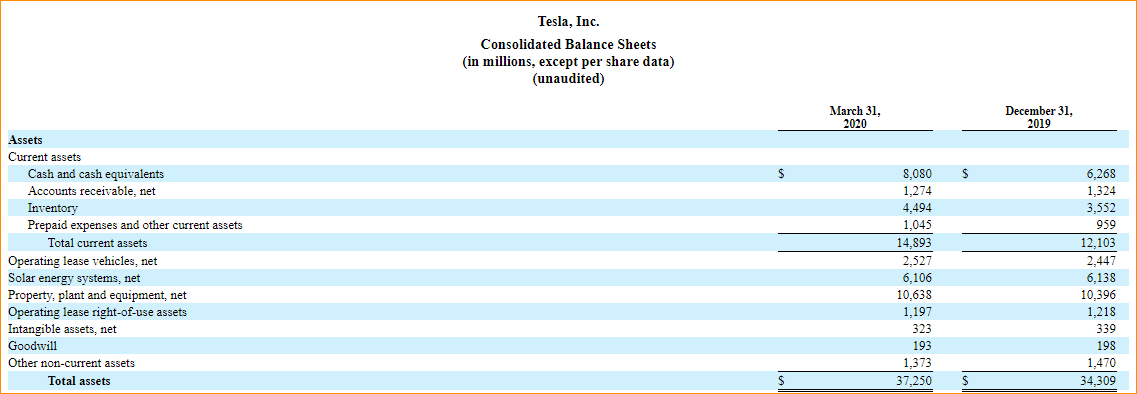

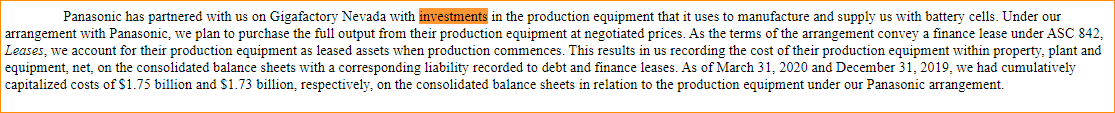
'0001564590-20-019931', pg. 19

In [40]:
abt[['company_name', 'Short_term_investments', 'Filing/Acc.No.']][abt['company_name']=='Tesla']

,company_name,Short_term_investments,Filing/Acc.No.
0,Tesla,NaN,"10-Q, 0001564590-20-019931"
1,Tesla,NaN,"10-Q, 0001564590-19-038256"
2,Tesla,NaN,"10-Q, 0001564590-19-026445"
3,Tesla,NaN,"10-Q, 0001564590-19-013462"
4,Tesla,NaN,"10-Q, 0001564590-18-026353"
5,Tesla,NaN,"10-Q, 0001564590-18-019254"
6,Tesla,NaN,"10-Q, 0001564590-18-011086"
7,Tesla,NaN,"10-Q, 0001564590-17-021343"
8,Tesla,NaN,"10-Q, 0001564590-17-015705"
9,Tesla,NaN,"10-Q, 0001564590-17-009968"


In [41]:
# Create Indicator Variable 
abt['Short_term_investments_missing'] = abt['Short_term_investments'].isnull().astype(int)

In [42]:
# Fill in the original missing value with 0.
abt['Short_term_investments'].fillna(0, inplace=True)

In [43]:
# Checking if there are any other missing values in the feature. 
abt[ 'Short_term_investments' ].isnull().sum()

0

***The above described process is how we reiterated through each column that share semantic similarity in the column name and visually compared if the data 'fit' together cohesively. This painstaking process is essentially how we ended up with the vlaues in the col_name_converter dictionary.***

We will iterate over the processes described above to clean the remainder of our dataframe either by:

1) Create Indicator Variable to show missingness across a company

or

2) Merge and combine multiple simialr columns together to form a feature. 

### Inventory
#### Netflix missing

In [44]:
# Netflix Inventory name is Content Assets.
abt['Inventory'] = abt[['Inventory', 'Content Assets']].sum(axis=1, min_count=1)
abt.drop(['Content Assets'], axis=1, inplace=True)

#### Facebook missing

In [45]:
# Facebook does not have Inventory. 
abt['Inventory_missing'] = abt['Inventory'].isnull().astype(int)
abt['Inventory'].fillna(0, inplace=True)
abt[ 'Inventory_missing' ].isnull().sum()

0

### Total Non-Current Assets
####  Ford missing

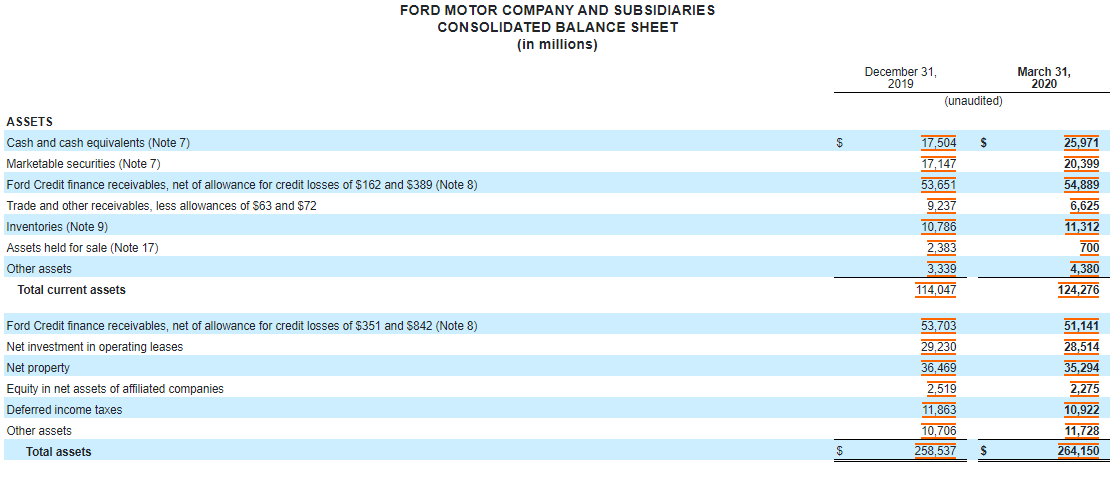
'0000037996-20-000041'

##### 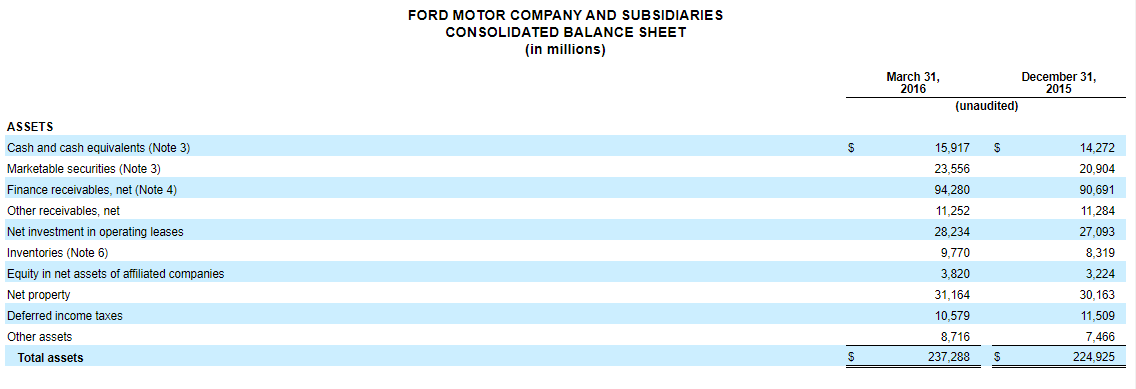
'0000037996-16-000107'

In [46]:
# Conceptually: Total_Assets - Total current assets = Total Non-Current Assets
df = abt['Total_Assets'][abt['company_name']=='Ford'] - abt['Total current assets'][abt['company_name']=='Ford']

In [47]:
abt['Total Non-Current Assets'][abt['company_name']=='Ford'] = df

C:\Users\Matthew\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


The remaining missing instances should be sparse and low enough for us to make meaningful interpolations on the data. 

In [48]:
dirty_col_name = list(abt.columns[abt.isna().sum() > 0])
print(f'dirty_col_name list has {len(dirty_col_name)} values')

dirty_col_name list has 53 values


In [49]:
# Columns that need to be dropped. 
dirty_col_name_loc = []

for columns in dirty_col_name:
    
    ratio = abt[columns].notna().astype(int).mean()
    
    # Set ( valid : missing ) ratio threshold
    if 0.6 > ratio:
        
        dirty_col_name_loc.append((columns, ratio))

print(f'Length of dirty_col_name_loc: {len(dirty_col_name_loc)} \n' )
pprint( sorted(dirty_col_name_loc, key=lambda tup : tup[1] ) )

Length of dirty_col_name_loc: 44 

[('Solar bonds issued to related parties', 0.0273972602739726),
 ('Series A', 0.030821917808219176),
 ('Series B', 0.030821917808219176),
 ('MyPower customer notes receivable', 0.04452054794520548),
 ('Solar energy systems', 0.04794520547945205),
 ('Total Noncontrolling interests in subsidiaries', 0.04794520547945205),
 ('Capital surplus', 0.05136986301369863),
 ('Automotive debt payable within one year', 0.0547945205479452),
 ('Automotive long term debt', 0.0547945205479452),
 ('Total Resale value guarantees', 0.06164383561643835),
 ('Total Convertible Senior Notes', 0.06164383561643835),
 ('Income taxes receivable', 0.06506849315068493),
 ('Non marketable investments', 0.06506849315068493),
 ('Accrued compensation and benefits', 0.06506849315068493),
 ('Accrued revenue share', 0.06506849315068493),
 ('Total Restricted cash and marketable securities', 0.0684931506849315),
 ('Total Restricted Cash', 0.07191780821917808),
 ('Operating lease vehicles', 

Before we delete the features, let's have a last look at it. 
From the above output we see **'Goodwill'** has the highest non-null values, but still only half of the values are present for the feature the other half is missing. Unfortuantely we could not fill in the missing values. So we will delete the rest of dirty_col_name_loc. 

In [50]:
# Delete the columns that are too dirty for us to inpute/clean.
abt.drop([name for name, ratio in  dirty_col_name_loc], axis=1, inplace=True)

In [51]:
abt.shape

(292, 25)

## Set the index, and reset the index to perform time-series manipulations. 

In [52]:
# Create new Dataframe, first ordered by company, then chronologically. 
df_ordered_list = []

for name in company_name.keys():
    df = abt[ abt['company_name'] == name ].copy()
    df.set_index(['Year', 'Quarter'], drop=True, inplace=True)
    df.sort_index(ascending=True, sort_remaining= True, inplace=True)
    df_ordered_list.append(df)

In [53]:
df_ordered = pd.concat(df_ordered_list)

# Where is the Missing Values?


In [54]:
# Check to see the spread of missing values. 
null_mask = df_ordered.isna().groupby(df_ordered['company_name'], sort=True).sum()
null_mask

,Accounts Receivable,Inventory,Total current assets,Total current liabilities,Total liabilities,Common Stock,Total liabilities and equity,Filing/Acc.No.,company_name,New Deferred Revenue,New Property and Equipment,Total Non-Current Assets,Total_Assets,Non-Current Liabilities,Total Shareholder's Equity,Accounts Payables,Retained Earning,OCI,Accounts_Receivable_missing,Common_Stock_missing,Short_term_investments,Short_term_investments_missing,Inventory_missing
company_name,,,,,,,,,,,,,,,,,,,,,,,
Amazon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,8.0,0.0,7.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
Facebook,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ford,0.0,0.0,14.0,14.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,14.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
Google,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Microsoft,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Netflix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
Tesla,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# Create a mask to filter out only the missing values. 
sum_of_nulls = null_mask[ null_mask>0 ].dropna(axis=1, how='all').dropna(axis=0, how='all').fillna(False)

In [56]:
# Show shape and concise view of filtered result. 
print(sum_of_nulls.shape)
sum_of_nulls

(7, 9)


,Total current assets,Total current liabilities,Total liabilities,New Deferred Revenue,Total Non-Current Assets,Non-Current Liabilities,Accounts Payables,Retained Earning,OCI
company_name,,,,,,,,,
Apple,False,False,False,6,8,7,False,False,3
Ford,14,14,False,4,14,12,False,False,False
GM,False,False,False,False,False,False,False,5,False
Google,False,False,2,False,False,False,False,False,False
Microsoft,False,False,False,False,False,False,False,False,1
Netflix,False,False,False,False,5,False,1,False,4
Tesla,False,False,False,False,False,10,False,False,10


In [57]:
columns =  list(sum_of_nulls.columns)
index = list(sum_of_nulls.index)
print(columns, '\n', index)

['Total current assets', 'Total current liabilities', 'Total liabilities', 'New Deferred Revenue', 'Total Non-Current Assets', 'Non-Current Liabilities', 'Accounts Payables', 'Retained Earning', 'OCI'] 
 ['Apple', 'Ford', 'GM', 'Google', 'Microsoft', 'Netflix', 'Tesla']


In [58]:
null_list = [(attr, name) for name  in index for attr in columns if sum_of_nulls[attr][sum_of_nulls.index==name].any()]
len(null_list)

17

Apple New Deferred Revenue
This requires Extrapolation


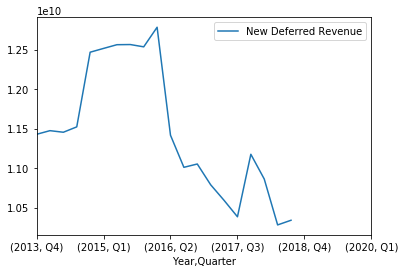

----------------------------------------------------------------------
Apple Total Non-Current Assets
This requires Extrapolation


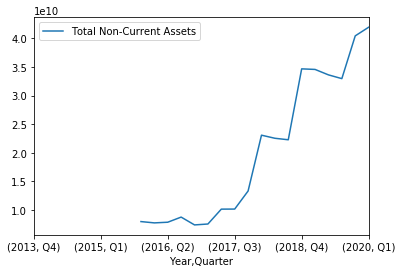

----------------------------------------------------------------------
Apple Non-Current Liabilities
This requires Extrapolation


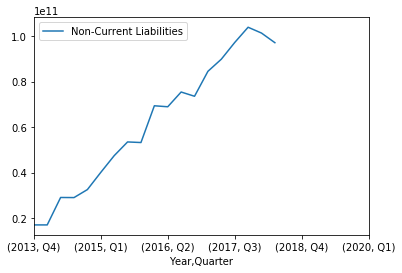

----------------------------------------------------------------------
Apple OCI
This requires Interpolation


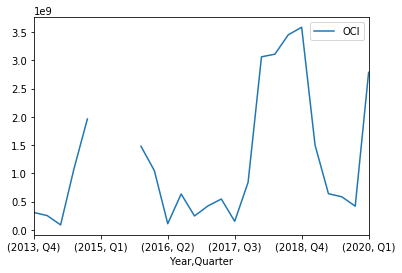

----------------------------------------------------------------------
Ford Total current assets
This requires Extrapolation


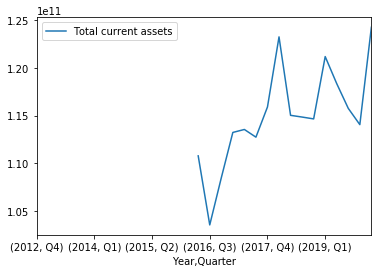

----------------------------------------------------------------------
Ford Total current liabilities
This requires Extrapolation


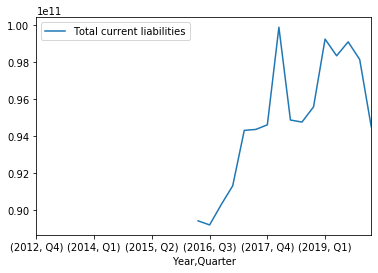

----------------------------------------------------------------------
Ford New Deferred Revenue
This requires Extrapolation


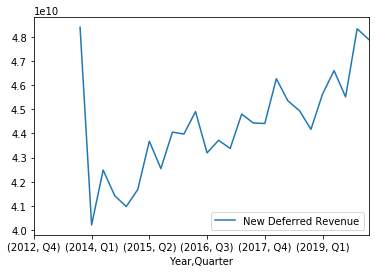

----------------------------------------------------------------------
Ford Total Non-Current Assets
This requires Extrapolation


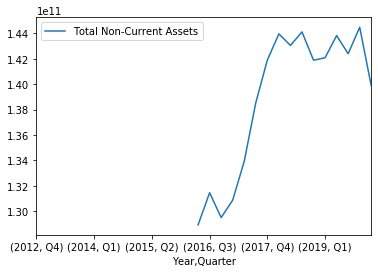

----------------------------------------------------------------------
Ford Non-Current Liabilities
This requires Extrapolation


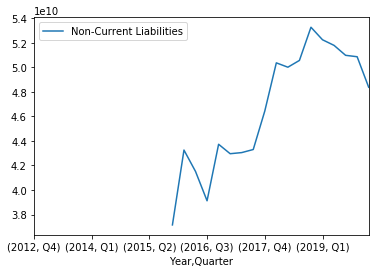

----------------------------------------------------------------------
GM Retained Earning
This requires Extrapolation


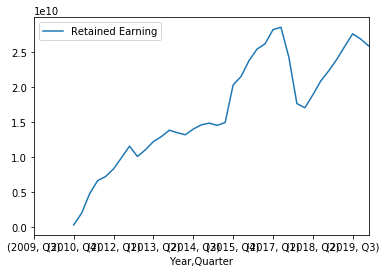

----------------------------------------------------------------------
Google Total liabilities
This requires Extrapolation


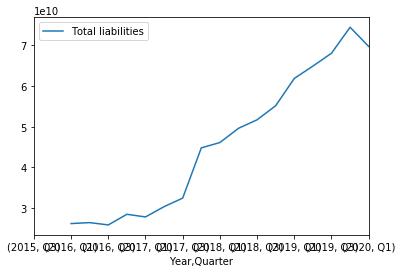

----------------------------------------------------------------------
Microsoft OCI
This requires Extrapolation


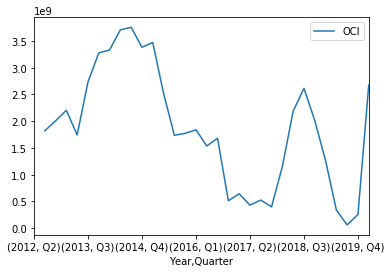

----------------------------------------------------------------------
Netflix Total Non-Current Assets
This requires Extrapolation


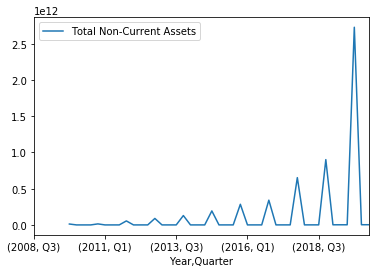

----------------------------------------------------------------------
Netflix Accounts Payables
This requires Interpolation


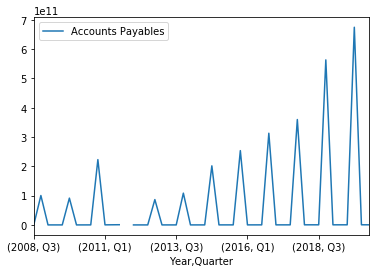

----------------------------------------------------------------------
Netflix OCI
This requires Extrapolation


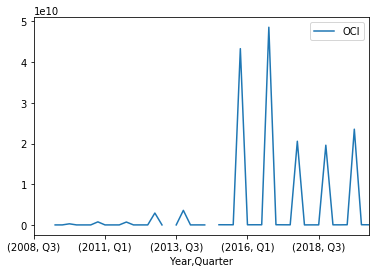

----------------------------------------------------------------------
Tesla Non-Current Liabilities
This requires Extrapolation


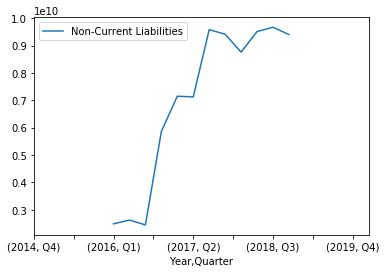

----------------------------------------------------------------------
Tesla OCI
This requires Extrapolation


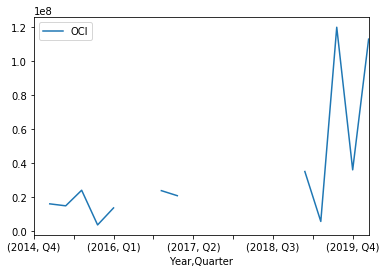

----------------------------------------------------------------------


In [141]:
# Detect missing values are in the middle or at the sides, extrapolation or interpolation 
interpolate = []
extrapolate = []

for attr, name in null_list:
    plt.figure()
    print(name, attr)
    
    whole_column_index = df_ordered[attr][(df_ordered['company_name']==name)]
    missing = df_ordered[attr][(df_ordered['company_name']==name) & (df_ordered[attr].isna())]
    
    num_of_missing = len(missing)
#     print('Number of missing values: ', num_of_missing)
    
    missing_year_list = list(missing.index)
#     print('This is the missing year distribution: ', missing_year_list)

    whole_year_min = whole_column_index[:1].index.values[0]
    whole_year_max = whole_column_index[-1:].index.values[0]
    
    if (whole_year_min in missing_year_list) or (whole_year_max in missing_year_list):
        print('This requires Extrapolation')
        extrapolate.append( (name, attr) )
        
    elif (whole_year_min not in missing_year_list) or (whole_year_max not in missing_year_list):
        print('This requires Interpolation')
        interpolate.append( (name, attr) )
        
    df_ordered[attr][df_ordered['company_name']==name].plot(legend=True)
    plt.show()
    print('-'*70)
    

In [138]:
interpolate

[('Apple', 'OCI'), ('Netflix', 'Accounts Payables')]

In [139]:
extrapolate

[('Apple', 'New Deferred Revenue'),
 ('Apple', 'Total Non-Current Assets'),
 ('Apple', 'Non-Current Liabilities'),
 ('Ford', 'Total current assets'),
 ('Ford', 'Total current liabilities'),
 ('Ford', 'New Deferred Revenue'),
 ('Ford', 'Total Non-Current Assets'),
 ('Ford', 'Non-Current Liabilities'),
 ('GM', 'Retained Earning'),
 ('Google', 'Total liabilities'),
 ('Microsoft', 'OCI'),
 ('Netflix', 'Total Non-Current Assets'),
 ('Netflix', 'OCI'),
 ('Tesla', 'Non-Current Liabilities'),
 ('Tesla', 'OCI')]

From the above we can clearly see which company and features need to be interpolated and which need to be extrapolated. 

In [ ]:
# 

## The following needs Interpolation

In [69]:
# Both
print(list(df_ordered['OCI'][(df_ordered['company_name']=='Tesla') & (df_ordered['OCI'].isna())].unstack().index.values))

[2014, 2016, 2017, 2018]


In [1]:
# Both Interpolation and Extrapolation
df_ordered['OCI'][(df_ordered['company_name']=='Netflix')] 

NameError: name 'df_ordered' is not defined

In [ ]:
df_ordered['Accounts Payables'][(df_ordered['company_name']=='Netflix')] 

In [ ]:
df_ordered['OCI'][(df_ordered['company_name']=='Apple')] 

## The following needs Extrapolation

In [ ]:
df_ordered['Non-Current Liabilities'][(df_ordered['company_name']=='Tesla')] 

In [ ]:
df_ordered['Total Non-Current Assets'][(df_ordered['company_name']=='Netflix')] 

In [ ]:
df_ordered['OCI'][(df_ordered['company_name']=='Microsoft')] 

In [ ]:
df_ordered['Total liabilities'][(df_ordered['company_name']=='Google')] 

In [ ]:
df_ordered['Retained Earning'][(df_ordered['company_name']=='GM')] 

In [ ]:
df_ordered['New Deferred Revenue'][(df_ordered['company_name']=='Ford')] 

In [ ]:
df_ordered['Non-Current Liabilities'][(df_ordered['company_name']=='Apple')] 

In [ ]:
df_ordered['Total Non-Current Assets'][(df_ordered['company_name']=='Apple')] 

In [ ]:
df_ordered['New Deferred Revenue'][(df_ordered['company_name']=='Apple')] #& (df_ordered['New Deferred Revenue'].isna())].interpolate()

## 2.3 Extrapolation

Which is a better method to fill in time series data? Our metric of comparison is MSE.

In [ ]:
df_ordered['Total current assets'][df_ordered['company_name']=='Ford']

In [ ]:
# First lets grab all of Ford columns with nan values into a df.  
nan_Ford = df_ordered[['Total current assets', 'Total Non-Current Assets', 'Total_Assets', 'Total liabilities', 'Total current liabilities', 'Non-Current Liabilities']][df_ordered['company_name']=='Ford'].sort_index(ascending=False, sort_remaining= True, inplace=False)

# 'Total Non-Current Assets' is made up from subtracting 'Total current assets'  from 'Total_Assets'.
# nan_Ford['Total Non-Current Assets'] + nan_Ford['Total current assets'] == nan_Ford['Total_Assets']

In [ ]:
# nan_Ford

Considering the relationship of our missing Asset-side data, we only need to infer the ratio between 'Total current assets' and 'Total Non-current Assets' from before 2016 Q1. As the sum of these two missing values is known as 'Total_Assets'.

The ratios between current and non-current assets exhibit a relatively stable relationship. (see plot below)

#### Total current assets

In [ ]:
valid_rows = len(nan_Ford['Total current assets'][nan_Ford['Total current assets'].notna()])
# Ratio between 'Total current assets' and 'Total Non-Current Assets'.
TCA_TA_ratio = nan_Ford['Total current assets'][:valid_rows] / nan_Ford['Total_Assets'][:valid_rows]
#Plot ratio.
# TCA_TA_ratio.plot(ylim=[0.4, 0.5])

Therefore we will try to use autoregressive moving average to extrapolate the missing values. 

In [ ]:
from statsmodels.tsa.arima_model import ARMA

In [ ]:
# Our small sample of training data are the non-null ratios. 
train_data = TCA_TA_ratio[TCA_TA_ratio.notna()].values
# print(train_data)

In [ ]:
# ARMA( order = p=1, q=0 )
model = ARMA(train_data, order=(2,2))
model_fitted = model.fit()
# print(model_fitted.summary())
pred_ratio_TCA = model_fitted.predict(start=valid_rows+1, end=len(nan_Ford)-1)
print(pred_ratio_TCA)

In [ ]:
# Create a ratio dataframe for plotting. 
ratio_plot = pd.DataFrame(pred_ratio_TCA, range(len(pred_ratio_TCA)))
# Using values p=2, q=2, we have a stationary prediction. 
# ratio_plot.plot()

In [ ]:
fill_TCA = nan_Ford['Total current assets'].copy()
fill_TCA[fill_TCA.isna()] = nan_Ford['Total_Assets'][valid_rows:]*pred_ratio_TCA
# (1,0)

In [ ]:
# Update our main df. 
df_ordered['Total current assets'][df_ordered['company_name']=='Ford'] = fill_TCA

When p=1, and q=0 visually looks good, after checking larger values there are no improvement, so we will use the predictions where p=1, and q=0. 

In [ ]:
nan_Ford['Total current assets'] = fill_TCA

#### Total Non-Current Assets

In [ ]:
nan_Ford['Total Non-Current Assets'] = nan_Ford['Total_Assets'] - nan_Ford['Total current assets']

In [ ]:
# Update our main df.
df_ordered['Total Non-Current Assets'][df_ordered['company_name']=='Ford'] = nan_Ford['Total Non-Current Assets']

We will do the same for 'Total current liabilities', and 'Non-Current Liabilities'.

#### Total current liabilities 

In [ ]:
# From the plot below, we see the relationship remains very stable, so we will use the mean instead.
valid_rows = len(nan_Ford['Total current liabilities'][nan_Ford['Total current liabilities'].notna()])
# Ratio between 'Total current assets' and 'Total Non-Current Assets'.
TCL_TL_ratio = nan_Ford['Total current liabilities'][:valid_rows] / nan_Ford['Total liabilities'][:valid_rows]
TCL_TL_ratio.plot(ylim=[0.4, 0.45])

In [ ]:
# Deducting the most recent data, we will have a stationary time-series. 
TCL_TL_ratio.plot(kind='bar',ylim=[0.4, 0.45])

In [ ]:
# delete the most recent data & most irrelevant. 
TCL_TL_ratio.pop((2020, 'Q1'))

In [ ]:
valid_rows+1

In [ ]:
# Our small sample of training data are the non-null ratios. 
train_data = TCL_TL_ratio[TCL_TL_ratio.notna()].values
# print(train_data)

In [ ]:
# ARMA( order = p=1, q=0 )
model = ARMA(train_data, order=(1,1))
model_fitted = model.fit()
# print(model_fitted.summary())
pred_ratio_TCL = model_fitted.predict(start=(valid_rows+1), end=(len(nan_Ford)-2))
print(pred_ratio_TCL)

In [ ]:
len(pred_ratio_TCL)

In [ ]:
fill_TCL = nan_Ford['Total current liabilities'].copy()
fill_TCL[fill_TCL.isna()] = nan_Ford['Total liabilities'][valid_rows:]*pred_ratio_TCL

In [ ]:
# fill_TCL.plot()

In [ ]:
# Update our main df. 
df_ordered['Total current liabilities'][df_ordered['company_name']=='Ford'] = fill_TCL

#### Non-Current Liabilities

In [ ]:
valid_rows = len(nan_Ford['Non-Current Liabilities'][nan_Ford['Non-Current Liabilities'].notna()])
# Ratio between 'Total current assets' and 'Total Non-Current Assets'.
NCL_TL_ratio = nan_Ford['Non-Current Liabilities'][:valid_rows] / nan_Ford['Total liabilities'][:valid_rows]

In [ ]:
NCL_TL_ratio.plot(ylim= [0.18, 0.25])

In [ ]:
NCL_TL_ratio.describe()

The data does not represent a stationary time series, and has a low std, we will use the mean to approximate the relationship.

In [ ]:
fill_NCL = nan_Ford['Non-Current Liabilities'].copy()
fill_NCL[fill_NCL.isna()] = nan_Ford['Total liabilities'][valid_rows:]*NCL_TL_ratio.mean()

In [ ]:
fill_NCL.plot(figsize=(8,8))

In [ ]:
# Update our main df. 
df_ordered['Non-Current Liabilities'][df_ordered['company_name']=='Ford'] = fill_NCL

In [ ]:
nan_Ford

Great! Ford looks all clean, we will move onto the other compnaies. 

In [ ]:
# Check to see the spread of missing values. 
null_mask = df_ordered.isna().groupby(df_ordered['company_name'], sort=True).sum()
# Create a mask to filter out only the missing values. 
sum_of_nulls = null_mask[ null_mask>0 ].dropna(axis=1, how='all').dropna(axis=0, how='all').fillna(False)
print(sum_of_nulls.shape)
sum_of_nulls

In [ ]:
methods = ['linear', 'quadratic', 'cubic', 'akima', 'polynomial']
df = pd.DataFrame({m: TCA_Ford.interpolate(method=m, order=2, limit_direction='backward') for m in methods})
df.plot()

In [ ]:
noninterp_idx_names = [idx_name for idx_name in TCA_Ford.index.names if idx_name != 'Quarter']

In [ ]:
noninterp_idx_names

In [ ]:
for _, grp in TCA_Ford.groupby(['Year']):
    print('This is _', _) # int()
    print('grp type is - ', type(grp))
    print(grp) # pd.Series
    
    
    sub_df = pd.to_numeric(grp, errors='coerce').set_index('Quarter').interpolate(method='index')
    print(sub_df)
    
    print('\n','-'*45)

In [ ]:
type(pd.to_numeric(grp, errors='coerce'))

In [ ]:
def interp_multiindex(df, interp_idx_name):
    """
    Provides index-based interpolation for pd.Multiindex which usually only support linear
    interpolation. Interpolates full DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame with NaN values
    interp_idx_name : str
        The name of the multiindex level on which index-based interpolation should take place

    Returns
    -------
    df : pd.DataFrame
        The DataFrame with index-based interpolated values
    """
    # Get all index level names in order
    existing_multiidx = df.index
    # Remove the name on which interpolation will take place
    noninterp_idx_names = [idx_name for idx_name in existing_multiidx.names 
                           if idx_name != interp_idx_name]
    df = df.reset_index()
    concat_list = [pd.to_numeric(grp, errors='coerce').set_index(interp_idx_name).interpolate(method='index') 
                   for _, grp in df.groupby(noninterp_idx_names)]
    df = pd.concat(concat_list)
    df = df.reset_index().set_index(existing_multiidx.names)
    df = pd.DataFrame(index=existing_multiidx).join(df)
    return df

In [ ]:
interp_multiindex(TCA_Ford, 'Quarter' )

In [ ]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [ ]:
x=TCA_Ford.index.values
y=TCA_Ford.values

f = interp1d(x, y)
f2 = interp1d(x, y)


In [ ]:
np.linspace(0, 10, num=41, endpoint=True)

In [ ]:
interp1d(x=TCA_Ford.index.values, y=TCA_Ford.values)

In [ ]:
TCA_Ford.interpolate(method='polynomial', order=1, limit_area=None).plot()

In [ ]:
# Average of polynomial and akima interpolations
order1 = TCA_Ford.interpolate(method='polynomial', order=1, limit_direction='both')
order2 = TCA_Ford.interpolate(method='polynomial', order=2, limit_direction='both')
ser = (order1 + order2)/2

pd.DataFrame({'ser': ser, 'order1': order1, 'order2': order2}).plot()

In [ ]:
ser.plot()

In [ ]:
TCA_Ford.plot()

Mo

# https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#interpolation

# 3. Feature Engineering, Ratios

In [ ]:
pd.concat([test_data, predictions]).plot()

In [ ]:
TCA_TNCA_ratio.rolling(window=1).mean().plot()

# August 7, above

# Querying the Dataframe's Missing Data by Keywords

In [ ]:
# Total amount of company names. 
list_company_name = list(company_name.keys())
print(len(list_company_name), list_company_name)

# Querying the dataframe using broswse_term, returns descriptive information. 
count = 0
col_container = []

keyword = input('Enter search keyword: ')
if keyword == '':
    broswse_term = ''
else:
    broswse_term = keyword
    
print(f'(*Only Accepts Numbers!), largest_max: {len(list_company_name)+1}')
max_com = int(input('Enter maximum of unique companies returned per column name: '))
    
print(f'(*Only Accepts Numbers!), largest_min: {len(list_company_name)-1}')
in_min = int(input('Enter minimum of unique companies returned per column name: '))
if in_min == '':
    min_com = 0
else:
    min_com = in_min
print('\n\n')
for name in dirty_col_name:
    
    if re.search(f'{broswse_term}.*', name, flags=re.I):
        
        company_name_isna_list = abt['company_name'][abt[name].isna()]
        com_container = [ (col_name, freq) for (col_name, freq) in Counter(company_name_isna_list).items() ]
        
        company_name_notna_list = abt['company_name'][abt[name].notna()]
        postive_container = [ (col_name, freq) for (col_name, freq) in Counter(company_name_notna_list).items() ]
               
        amt_flagged = len(com_container)
        
        if  max_com > amt_flagged > min_com:
            
            print("\033[1m{", name , "}\033[0m")
            count+=1
            print('The following companies have nan values for the above description. Number of nan columns')
            print( com_container)
            
            print("-"*70, f'\nHow many companies do not have this column name - {amt_flagged}\n', "-"*70)
                        
            print('The following companies have numbers for this name.')
            print(postive_container)
            #print([com_name for com_name in list_company_name if com_name not in [company_name for company_name, freq in com_container]])
            print()
            col_container.append(name)

print(f'\n\nCurrently looking at {count} columns with term - \'{broswse_term}\'.\n', '~'*70)
print(col_container)

col_container.insert(0, 'company_name')
col_container.insert(len(col_container), 'Filing/Acc.No.')

abt[col_container]


In [ ]:
df = abt[col_container]
df.groupby(['company_name'], sort=True).mean()

In [ ]:
??

In [ ]:
df = abt[col_container]
corr = df.corr()

kot = corr[corr>=.8]
plt.figure(figsize=(12,12))
sns.heatmap(kot, cmap="Greens")

# Truth Zip Match Method of Merging Similar Columns 

In [ ]:
np.random.seed(1)
test_list2 = np.random.rand(10, 2)
df2 = pd.DataFrame(test_list2, columns= ['A', 'F'])
df_1 = df2[df2>0.5].isna()


In [ ]:
ICD.display(df_1, df_2)

In [ ]:
sample_test_TF  = pd.concat([df1[df1<0.5].isna(), df1[df1>0.5].isna() ], axis=1)
sample_test_TF

In [ ]:
sample_test_TF2

In [ ]:
sample_TF = df1[df1>0.5].isna()

In [ ]:
sample_TF

In [ ]:
np.random.seed(123)
test_list = np.random.rand(10, 2)
df1 = pd.DataFrame(test_list, columns= ['C', 'D'])
df_rand =  df1[df1>0.5].isna()
df_rand

In [ ]:
zip(df_1['F'] , df_2['B'])

In [ ]:
# Zip two columns using list comprehension 
zip_test = [num for num in zip(df_1['F'] , df_2['B'])]
pprint(zip_test )

In [ ]:
# If the right doesnt match the left, then +=1
match = 0
for a, b in zip_test:
    print(type(a))
    if a != b:
        match+=1
    
total_num = len(zip_test)
match/total_num

In [ ]:
comparing_columns(abt)


### Creating a matching metric; 1.0 represents a perfect match, 0.0 represents no match 

 - s1 = pd.Series(['X0', 'X1', 'X2', 'X3'], name='X')
 - result = pd.concat([df1, s1], axis=1)
#### Source: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
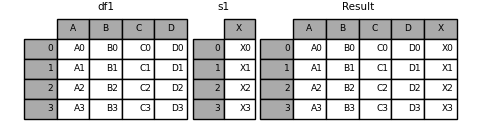

In [ ]:
test_TF = abt['Total Assets'].isna()
type(test_TF)

In [ ]:
corr = abt.corr()

kot = corr[corr>=.5]
plt.figure(figsize=(12,12))
sns.heatmap(kot, cmap="Greens")

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(abt, 3))

In [ ]:
corr = abt.corr(method='pearson')
bot = corr[corr>=.8]
bot

In [ ]:
reference_list = abt[dirty_col_name_loc].groupby(abt['company_name'], sort=True).apply(comparing_columns())

In [ ]:
def comparing_columns( df ):
    
    total_num_col = len(df)
    list_col_name = list(df.columns[df.isna().sum()>1])
    
    reference_list = {}
    
    for target_col_name in list_col_name:
        print(f'------ target_col_name - {target_col_name} ------')
        for default_col_name in list_col_name:
            
            zip_col = [ row for row in zip( df[target_col_name].isna(), df[default_col_name ].isna() ) ]
            match = 0

            
            for col_a, col_b in zip_col:
                if col_a != col_b:
                    match+=1 

            match_ratio = match/total_num_col
#             print(f'{default_col_name} : {match_ratio}')
            
            if 1 > match_ratio > 0.9:
                reference_list.update( {target_col_name : [default_col_name, match_ratio ] } )
                
            else:
                continue

    return reference_list
#                 print(f'\n ------------------------------ \n Does this match? ')
#                 print( target_col_name, default_col_name )
                
#                 response = input()
#                 if response == 'yes':

#                     # create new varible to store sum_value
#                     sum_value = df[target_col_name] + df[default_col_name]
#                     new_S = pd.Series(sum_value, name = target_col_name)

#                     # .drop(default_col_name)
#                     df = df.drop(columns= [target_col_name, default_col_name], axis= 'columns' )

#                     # pd.concat
#                     df = pd.concat([df, new_S], axis='columns')
#                     continue

#                 elif response == 'no':
#                     pass 

#                 elif response == 'stop':
#                     break

In [ ]:
pprint(reference_list) 

In [ ]:
sorted(reference_list.items(), key=lambda x: x[1])

In [ ]:
reference_list.pop('Accrued expenses and other')

In [ ]:
reference_list.pop('Deferred Revenue')

In [ ]:
reference_list

In [ ]:
reference_list.pop('Total assets')

In [ ]:
reference_list

In [ ]:
abt['Deferred Revenue']

In [ ]:
[df_1[col].mean() for col in df_1]

In [ ]:
[df_2[col].mean() for col in df_2]

In [ ]:
print( True + True )

In [ ]:
print( True + False )

In [ ]:
print(False + False)

# Considering Data Structures Storing dfs for the above method

In [ ]:
# Candidate One - sorted-dictionary
dict_variable = {key:value for (key,value) in dictonary.items()}

# Candidate Two - shelves / global 


# Column name Cleaners

In [ ]:
import nltk


In [ ]:
nltk.download('stopwords')

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer=WordNetLemmatizer()
input_str='been had done languages cities mice'
input_str=word_tokenize(input_str)
print(input_str, '\n')

for word in input_str:
    print(lemmatizer.lemmatize(word))

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in input_str if not w in stop_words]
tokens

In [ ]:
stop_words

In [ ]:
cleaned_col_name = []
for words in dirty_col_name:
    tokenized_list = word_tokenize(words)
    tokens = [w for w in tokenized_list if not w in stop_words]

    new_token = []
    for word in tokens:
        input_str = lemmatizer.lemmatize(word)
        new_token.append(input_str)
    cleaned_col_name.append(new_token)

In [ ]:
cleaned_col_name

In [ ]:
a_col_name, b_col_name = ['Total', 'Deferred', 'Revenue'], ['Deferred', 'Revenue']
print(f'a_col_name - {a_col_name}')
print(f'b_col_name - {b_col_name}')

In [ ]:
a_col_name, b_col_name